In [3]:
import pandas as pd
import matplotlib.pyplot as plt

ply_pos = pd.read_csv('ply_pos.csv', index_col=0)
ply_pos

,First,Position
57,Joshua Kimmich,"RB,CM,CDM"
86,Daniel Carvajal Ramos,RB
119,João Pedro Cavaco Cancelo,RB
135,Kyle Walker,RB
139,César Azpilicueta Tanco,"RB,CB"
...,...,...
18512,Isaac Akinsete,RB
18523,Luke Offord,"CDM,RB"
18524,Ziyad Al Oyouni,RB
18539,Francisco Nevarez,RB


In [4]:
def_stat=pd.read_csv('RB_stat_def.csv').set_index('Rk')
def_stat[['First','Last']] = def_stat['Player'].str.split("\\",expand=True,)
def_stat.head()
#def_stat.to_csv('def_stat.csv',encoding = 'utf-8')

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklW,...,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches,First,Last
Rk,,,,,,,,,,,,,,,,,,,,,
1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28.0,1990.0,27.9,1.83,1.15,...,0.47,0.04,1.58,0.82,2.65,2.40,0.11,Matches,Patrick van Aanholt,Patrick-van-Aanholt
2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,eng Premier League,19.0,2000.0,36.0,1.78,1.00,...,0.83,0.06,1.94,0.56,2.33,2.39,0.00,Matches,Max Aarons,Max-Aarons
3,Yunis Abdelhamid\Yunis-Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31.0,1987.0,28.0,2.18,1.32,...,0.68,0.00,0.86,0.86,3.04,5.93,0.04,Matches,Yunis Abdelhamid,Yunis-Abdelhamid
4,Suleiman Abdullahi\Suleiman-Abdullahi,ng NGA,FWMF,Union Berlin,de Bundesliga,22.0,1996.0,1.7,0.59,0.59,...,0.59,0.00,1.18,0.59,1.18,1.18,0.00,Matches,Suleiman Abdullahi,Suleiman-Abdullahi
5,Mehdi Abeid\Mehdi-Abeid,dz ALG,MF,Nantes,fr Ligue 1,26.0,1992.0,20.2,2.97,2.03,...,0.15,0.00,0.74,0.84,3.81,1.09,0.00,Matches,Mehdi Abeid,Mehdi-Abeid


In [83]:
join_def_stat=pd.merge(def_stat,ply_pos,on='First')
join_def_stat=join_def_stat[join_def_stat['Nation'].str.contains('ENG',case=False)]

is_duplicate=join_def_stat.Player.duplicated(keep ='last') 
not_duplicate = ~is_duplicate
join_def_stat = join_def_stat[not_duplicate]

join_def_stat = join_def_stat[join_def_stat.First != 'Thomas Doyle']
join_def_stat = join_def_stat[join_def_stat.First != 'Reece Oxford']
join_def_stat = join_def_stat[join_def_stat.First != 'Ben Johnson']
join_def_stat = join_def_stat[join_def_stat.First != 'Axel Tuanzebe']


join_def_stat=join_def_stat.reset_index()
join_def_stat

,index,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,...,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches,First,Last,Position
0,0,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,eng Premier League,19.0,2000.0,36.0,1.78,...,0.06,1.94,0.56,2.33,2.39,0.00,Matches,Max Aarons,Max-Aarons,RB
1,5,Trent Alexander-Arnold\Trent-Alexander-Arnold,eng ENG,DF,Liverpool,eng Premier League,20.0,1998.0,35.3,1.64,...,0.00,1.25,0.96,2.61,2.78,0.06,Matches,Trent Alexander-Arnold,Trent-Alexander-Arnold,RB
2,27,Sam Byram\Sam-Byram,eng ENG,DF,Norwich City,eng Premier League,25.0,1993.0,14.4,3.19,...,0.00,2.78,1.39,4.58,5.21,0.00,Matches,Sam Byram,Sam-Byram,RB
3,66,Simon Francis\Simon-Francis,eng ENG,DF,Bournemouth,eng Premier League,34.0,1985.0,10.8,1.57,...,0.00,1.39,0.65,2.22,8.43,0.19,Matches,Simon Francis,Simon-Francis,"CB,RB"
4,67,Ryan Fredericks\Ryan-Fredericks,eng ENG,DF,West Ham,eng Premier League,26.0,1992.0,24.9,3.45,...,0.04,1.33,0.80,4.26,3.65,0.00,Matches,Ryan Fredericks,Ryan-Fredericks,RB
5,72,Joe Gomez\Joe-Gomez,eng ENG,DF,Liverpool,eng Premier League,22.0,1997.0,22.3,1.17,...,0.00,0.76,0.85,2.02,4.04,0.04,Matches,Joe Gomez,Joe-Gomez,"CB,RB"
6,79,Mason Holgate\Mason-Holgate,eng ENG,DF,Everton,eng Premier League,22.0,1996.0,22.8,2.19,...,0.04,0.70,1.23,3.42,6.36,0.04,Matches,Mason Holgate,Mason-Holgate,"RB,CB"
7,85,Reece James\Reece-James,eng ENG,DF,Chelsea,eng Premier League,19.0,1999.0,16.8,2.50,...,0.00,2.26,0.83,3.33,2.32,0.00,Matches,Reece James,Reece-James,"RB,CDM"
8,92,James Justin\James-Justin,eng ENG,DF,Leicester City,eng Premier League,21.0,1998.0,11.2,3.13,...,0.00,1.61,0.71,3.84,2.68,0.00,Matches,James Justin,James-Justin,"RB,LB"
9,95,Jonjoe Kenny\Jonjoe-Kenny,eng ENG,DF,Schalke 04,de Bundesliga,22.0,1997.0,30.2,1.95,...,0.03,1.52,0.93,2.88,3.05,0.03,Matches,Jonjoe Kenny,Jonjoe-Kenny,RB


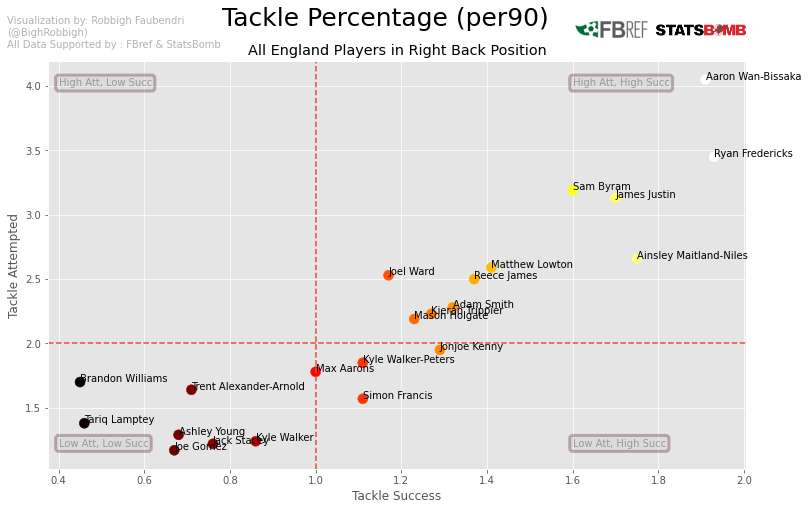

In [84]:
import matplotlib.pyplot as plt
import seaborn as sbn
from soccerplots.utils import add_image


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 7.5)

fig.suptitle('Tackle Percentage (per90)',fontsize=25)

#set annotate axis


plt.annotate('High Att, Low Succ', xy =(0.4, 4),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('Low Att, Low Succ', xy =(0.4, 1.2),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('High Att, High Succ', xy =(1.6, 4),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('Low Att, High Succ', xy =(1.6,1.2),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))

textstr = "Visualization by: Robbigh Faubendri\n(@BighRobbigh)\nAll Data Supported by : FBref & StatsBomb "
plt.text(0.28, 4.3, textstr, fontsize=10,alpha=0.3)


plt.style.use('ggplot')
plt.axhline(2,ls='--')
plt.axvline(1,ls='--')
plt.ylabel('Tackle Attempted')
plt.xlabel('Tackle Success')
ax.set_title('All England Players in Right Back Position')
ax.scatter(join_def_stat.TklW,join_def_stat.Tkl, c=join_def_stat.TklW,cmap='hot', s=100)



#ax.set_title('\nAll Defender DataFrom')
for i, txt in enumerate(join_def_stat.First):
    ax.annotate(txt, (join_def_stat.TklW[i], join_def_stat.Tkl[i]))
    

    
    
fig = add_image(image="FBREF2.png", fig=fig, left=0.65, bottom=0.85, width=0.2, height=0.175)
fig = add_image(image="statsbomb.png", fig=fig, left=0.8, bottom=0.9, width=0.1, height=0.075)


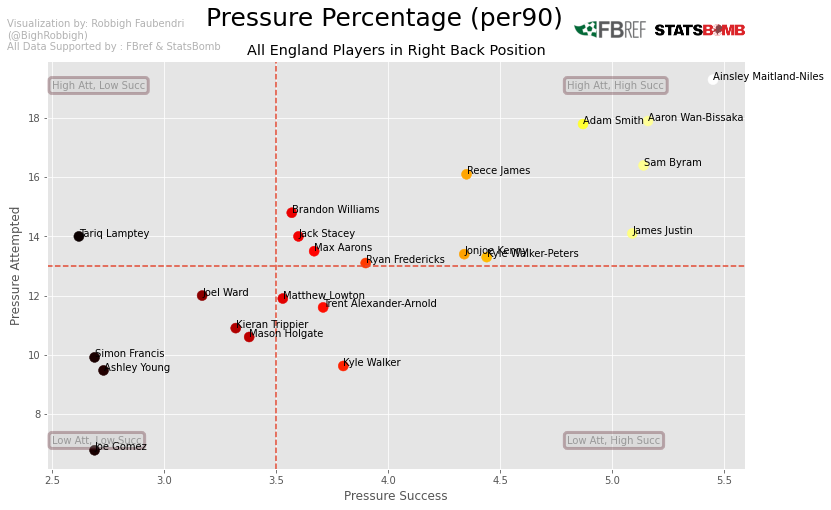

In [105]:
import matplotlib.pyplot as plt
import seaborn as sbn

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 7.5)

fig.suptitle('Pressure Percentage (per90)',fontsize=25)

#set annotate axis
plt.annotate('High Att, Low Succ', xy =(2.5, 19),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('Low Att, Low Succ', xy =(2.5, 7),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('High Att, High Succ', xy =(4.8, 19),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('Low Att, High Succ', xy =(4.8, 7),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))

textstr = "Visualization by: Robbigh Faubendri\n(@BighRobbigh)\nAll Data Supported by : FBref & StatsBomb "
plt.text(2.3, 20.3, textstr, fontsize=10,alpha=0.3)


plt.style.use('ggplot')
plt.axhline(13,ls='--')
plt.axvline(3.5,ls='--')
plt.ylabel('Pressure Attempted')
plt.xlabel('Pressure Success')
ax.set_title('All England Players in Right Back Position')
ax.scatter(join_def_stat.Succ,join_def_stat.Press, c=join_def_stat.Succ,cmap='hot', s=100)

#ax.set_title('\nAll Defender DataFrom')
for i, txt in enumerate(join_def_stat.First):
    ax.annotate(txt, (join_def_stat.Succ[i], join_def_stat.Press[i]))
        
fig = add_image(image="FBREF2.png", fig=fig, left=0.65, bottom=0.85, width=0.2, height=0.175)
fig = add_image(image="statsbomb.png", fig=fig, left=0.8, bottom=0.9, width=0.1, height=0.075)


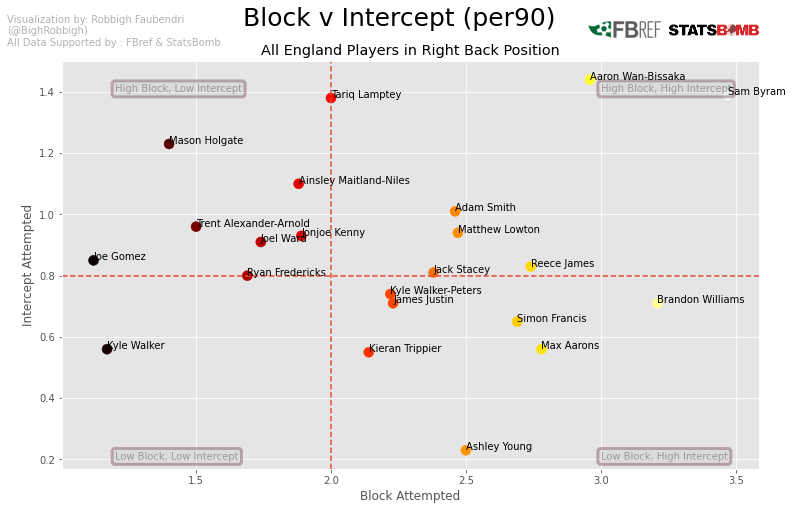

In [99]:
import matplotlib.pyplot as plt
import seaborn as sbn

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 7.5)

fig.suptitle('Block v Intercept (per90)',fontsize=25)

#set annotate axis
plt.annotate('High Block, Low Intercept', xy =(1.2, 1.4),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('Low Block, Low Intercept', xy =(1.2, 0.2),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('High Block, High Intercept', xy =(3, 1.4),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('Low Block, High Intercept', xy =(3, 0.2),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))

textstr = "Visualization by: Robbigh Faubendri\n(@BighRobbigh)\nAll Data Supported by : FBref & StatsBomb "
plt.text(0.8, 1.55, textstr, fontsize=10,alpha=0.3)


plt.style.use('ggplot')
plt.axhline(0.8,ls='--')
plt.axvline(2,ls='--')
plt.ylabel('Intercept Attempted')
plt.xlabel('Block Attempted')
ax.set_title('All England Players in Right Back Position')
ax.scatter(join_def_stat.Blocks,join_def_stat.Int, c=join_def_stat.Blocks,cmap='hot', s=100)

#ax.set_title('\nAll Defender DataFrom')
for i, txt in enumerate(join_def_stat.First):
    ax.annotate(txt, (join_def_stat.Blocks[i], join_def_stat.Int[i]))
    
fig = add_image(image="FBREF2.png", fig=fig, left=0.65, bottom=0.85, width=0.2, height=0.175)
fig = add_image(image="statsbomb.png", fig=fig, left=0.8, bottom=0.9, width=0.1, height=0.075)


In [74]:
pass_stat=pd.read_csv('pass_stat.csv').set_index('Rk')

pass_stat[['First','Last']] = pass_stat['Player'].str.split("\\",expand=True,)
pass_stat

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,Att,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches,First,Last
Rk,,,,,,,,,,,,,,,,,,,,,
1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28.0,1990.0,27.9,44.0,55.8,...,0.11,-0.04,1.15,3.08,0.90,0.18,7.71,Matches,Patrick van Aanholt,Patrick-van-Aanholt
2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,eng Premier League,19.0,2000.0,36.0,36.6,46.8,...,0.09,-0.06,0.67,1.19,0.89,0.36,3.39,Matches,Max Aarons,Max-Aarons
3,Yunis Abdelhamid\Yunis-Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31.0,1987.0,28.0,47.4,54.1,...,0.00,-0.00,0.07,1.61,0.11,0.00,2.96,Matches,Yunis Abdelhamid,Yunis-Abdelhamid
4,Suleiman Abdullahi\Suleiman-Abdullahi,ng NGA,FWMF,Union Berlin,de Bundesliga,22.0,1996.0,1.7,10.6,23.5,...,0.12,-0.12,0.59,1.18,1.18,0.59,2.94,Matches,Suleiman Abdullahi,Suleiman-Abdullahi
5,Mehdi Abeid\Mehdi-Abeid,dz ALG,MF,Nantes,fr Ligue 1,26.0,1992.0,20.2,39.7,47.4,...,0.07,0.03,1.29,4.21,0.30,0.20,4.06,Matches,Mehdi Abeid,Mehdi-Abeid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,Bongani Zungu\Bongani-Zungu,za RSA,MF,Amiens,fr Ligue 1,26.0,1992.0,11.0,39.7,48.9,...,0.03,-0.03,0.27,3.55,0.18,0.09,4.82,Matches,Bongani Zungu,Bongani-Zungu
2729,Szymon Żurkowski\Szymon-Zurkowski,pl POL,MF,Fiorentina,it Serie A,21.0,1997.0,0.1,40.0,40.0,...,0.00,0.00,0.00,10.00,0.00,0.00,0.00,Matches,Szymon Żurkowski,Szymon-Zurkowski
2730,David Zurutuza\David-Zurutuza,es ESP,MF,Real Sociedad,es La Liga,33.0,1986.0,1.7,35.9,48.2,...,0.00,0.00,0.00,1.76,0.59,0.00,3.53,Matches,David Zurutuza,David-Zurutuza


In [79]:
join_pass_stat=pd.merge(pass_stat,ply_pos,on='First')
join_pass_stat=join_pass_stat[join_pass_stat['Nation'].str.contains('ENG',case=False)]

is_duplicate=join_pass_stat.Player.duplicated(keep ='last') 
not_duplicate = ~is_duplicate
join_pass_stat = join_pass_stat[not_duplicate]

join_pass_stat = join_pass_stat[join_pass_stat.First != 'Thomas Doyle']
join_pass_stat = join_pass_stat[join_pass_stat.First != 'Reece Oxford']
join_pass_stat = join_pass_stat[join_pass_stat.First != 'Ben Johnson']
join_pass_stat = join_pass_stat[join_pass_stat.First != 'Axel Tuanzebe']


join_pass_stat=join_pass_stat.reset_index()
join_pass_stat

,index,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches,First,Last,Position
0,0,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,eng Premier League,19.0,2000.0,36.0,36.6,...,-0.06,0.67,1.19,0.89,0.36,3.39,Matches,Max Aarons,Max-Aarons,RB
1,5,Trent Alexander-Arnold\Trent-Alexander-Arnold,eng ENG,DF,Liverpool,eng Premier League,20.0,1998.0,35.3,63.9,...,0.09,2.41,5.72,2.55,0.85,13.00,Matches,Trent Alexander-Arnold,Trent-Alexander-Arnold,RB
2,27,Sam Byram\Sam-Byram,eng ENG,DF,Norwich City,eng Premier League,25.0,1993.0,14.4,43.4,...,-0.03,0.49,1.53,0.35,0.00,4.24,Matches,Sam Byram,Sam-Byram,RB
3,66,Simon Francis\Simon-Francis,eng ENG,DF,Bournemouth,eng Premier League,34.0,1985.0,10.8,39.4,...,-0.03,0.37,2.41,0.46,0.37,3.33,Matches,Simon Francis,Simon-Francis,"CB,RB"
4,67,Ryan Fredericks\Ryan-Fredericks,eng ENG,DF,West Ham,eng Premier League,26.0,1992.0,24.9,31.9,...,0.02,1.00,1.73,1.00,0.60,4.30,Matches,Ryan Fredericks,Ryan-Fredericks,RB
5,72,Joe Gomez\Joe-Gomez,eng ENG,DF,Liverpool,eng Premier League,22.0,1997.0,22.3,78.2,...,-0.01,0.22,5.83,0.49,0.09,4.26,Matches,Joe Gomez,Joe-Gomez,"CB,RB"
6,79,Mason Holgate\Mason-Holgate,eng ENG,DF,Everton,eng Premier League,22.0,1996.0,22.8,37.5,...,0.11,0.09,2.06,0.18,0.00,2.50,Matches,Mason Holgate,Mason-Holgate,"RB,CB"
7,85,Reece James\Reece-James,eng ENG,DF,Chelsea,eng Premier League,19.0,1999.0,16.8,62.8,...,-0.08,1.43,3.45,1.85,0.77,7.44,Matches,Reece James,Reece-James,"RB,CDM"
8,92,James Justin\James-Justin,eng ENG,DF,Leicester City,eng Premier League,21.0,1998.0,11.2,58.1,...,-0.02,1.16,3.66,1.25,0.63,6.43,Matches,James Justin,James-Justin,"RB,LB"
9,95,Jonjoe Kenny\Jonjoe-Kenny,eng ENG,DF,Schalke 04,de Bundesliga,22.0,1997.0,30.2,39.1,...,0.06,0.50,3.31,1.09,0.33,8.68,Matches,Jonjoe Kenny,Jonjoe-Kenny,RB


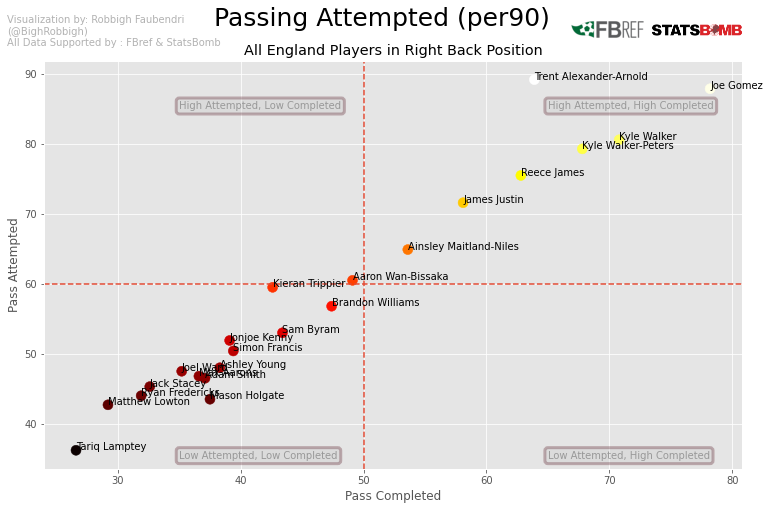

In [101]:
import matplotlib.pyplot as plt
import seaborn as sbn

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 7.5)

fig.suptitle('Passing Attempted (per90)',fontsize=25)

#set annotate axis
plt.annotate('High Attempted, Low Completed', xy =(35, 85),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('Low Attempted, Low Completed', xy =(35, 35),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('High Attempted, High Completed', xy =(65, 85),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('Low Attempted, High Completed', xy =(65, 35),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))

textstr = "Visualization by: Robbigh Faubendri\n(@BighRobbigh)\nAll Data Supported by : FBref & StatsBomb "
plt.text(21, 94, textstr, fontsize=10,alpha=0.3)


plt.style.use('ggplot')
plt.axhline(60,ls='--')
plt.axvline(50,ls='--')
plt.ylabel('Pass Attempted')
plt.xlabel('Pass Completed')
ax.set_title('All England Players in Right Back Position')
ax.scatter(join_pass_stat.Cmp,join_pass_stat.Att, c=join_pass_stat.Att,cmap='hot', s=100)

#ax.set_title('\nAll Defender DataFrom')
for i, txt in enumerate(join_pass_stat.First):
    ax.annotate(txt, (join_pass_stat.Cmp[i], join_pass_stat.Att[i]))
    
fig = add_image(image="FBREF2.png", fig=fig, left=0.65, bottom=0.85, width=0.2, height=0.175)
fig = add_image(image="statsbomb.png", fig=fig, left=0.8, bottom=0.9, width=0.1, height=0.075)


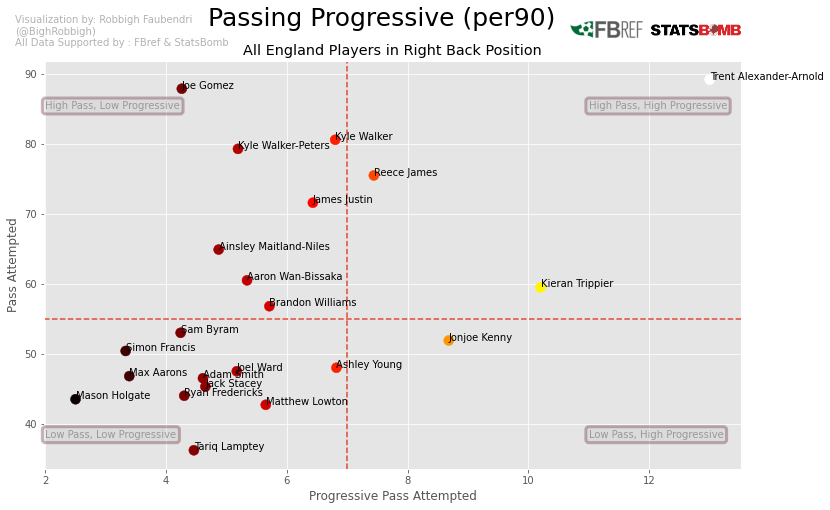

In [107]:
import matplotlib.pyplot as plt
import seaborn as sbn

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 7.5)

fig.suptitle('Passing Progressive (per90)',fontsize=25)

#set annotate axis
plt.annotate('High Pass, Low Progressive', xy =(2, 85),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('Low Pass, Low Progressive', xy =(2, 38),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('High Pass, High Progressive', xy =(11, 85),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('Low Pass, High Progressive', xy =(11, 38),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))

textstr = "Visualization by: Robbigh Faubendri\n(@BighRobbigh)\nAll Data Supported by : FBref & StatsBomb "
plt.text(1.5, 94, textstr, fontsize=10,alpha=0.3)


plt.style.use('ggplot')
plt.axhline(55,ls='--')
plt.axvline(7,ls='--')
plt.ylabel('Pass Attempted')
plt.xlabel('Progressive Pass Attempted')
ax.set_title('All England Players in Right Back Position')
ax.scatter(join_pass_stat.Prog,join_pass_stat.Att, c=join_pass_stat.Prog,cmap='hot', s=100)

#ax.set_title('\nAll Defender DataFrom')
for i, txt in enumerate(join_pass_stat.First):
    ax.annotate(txt, (join_pass_stat.Prog[i], join_pass_stat.Att[i]))
    
fig = add_image(image="FBREF2.png", fig=fig, left=0.65, bottom=0.85, width=0.2, height=0.175)
fig = add_image(image="statsbomb.png", fig=fig, left=0.8, bottom=0.9, width=0.1, height=0.075)


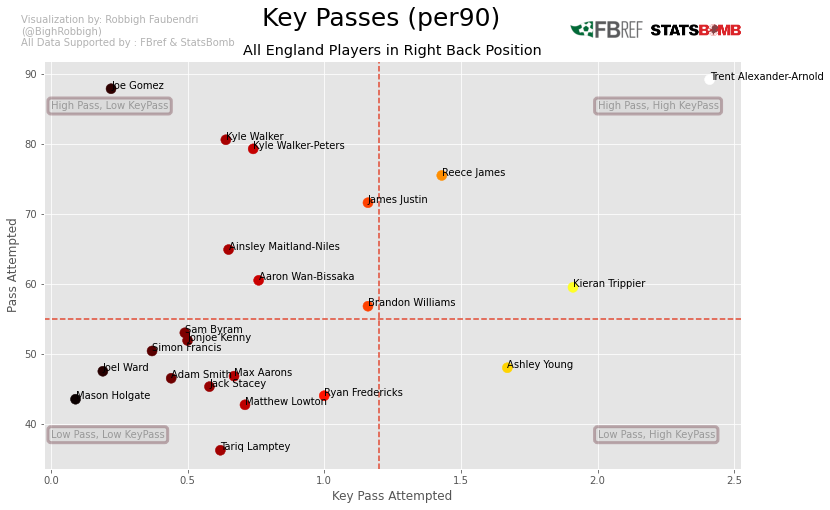

In [108]:
import matplotlib.pyplot as plt
import seaborn as sbn

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 7.5)

fig.suptitle('Key Passes (per90)',fontsize=25)

#set annotate axis
plt.annotate('High Pass, Low KeyPass', xy =(0, 85),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('Low Pass, Low KeyPass', xy =(0, 38),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('High Pass, High KeyPass', xy =(2, 85),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))
plt.annotate('Low Pass, High KeyPass', xy =(2, 38),alpha=0.3,bbox=dict(boxstyle="round", fc="#c6c6c6", ec="#53131f", lw=3,alpha=0.3))

textstr = "Visualization by: Robbigh Faubendri\n(@BighRobbigh)\nAll Data Supported by : FBref & StatsBomb "
plt.text(-0.11, 94, textstr, fontsize=10,alpha=0.3)


plt.style.use('ggplot')
plt.axhline(55,ls='--')
plt.axvline(1.2,ls='--')
plt.ylabel('Pass Attempted')
plt.xlabel('Key Pass Attempted')
ax.set_title('All England Players in Right Back Position')
ax.scatter(join_pass_stat.KP,join_pass_stat.Att, c=join_pass_stat.KP,cmap='hot', s=100)

#ax.set_title('\nAll Defender DataFrom')
for i, txt in enumerate(join_pass_stat.First):
    ax.annotate(txt, (join_pass_stat.KP[i], join_pass_stat.Att[i]))
    
fig = add_image(image="FBREF2.png", fig=fig, left=0.65, bottom=0.85, width=0.2, height=0.175)
fig = add_image(image="statsbomb.png", fig=fig, left=0.8, bottom=0.9, width=0.1, height=0.075)


In [104]:
test=join_pass_stat[['Cmp']]
test

,Cmp
0,36.6
1,63.9
2,43.4
3,39.4
4,31.9
5,78.2
6,37.5
7,62.8
8,58.1
9,39.1
